## Logistic Regression -iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [6]:
# print(iris.DESCR)

In [7]:
# target variable

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
Y = iris['target']

In [10]:
Y.shape

(150,)

In [11]:
dy = pd.DataFrame()

In [12]:
dy['iris'] = Y

In [13]:
pd.value_counts(dy.iris)

2    50
1    50
0    50
Name: iris, dtype: int64

In [14]:
# predictors (exogenous variables)

In [15]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
X = iris["data"]

In [17]:
X.shape

(150, 4)

In [18]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
# one feature: petal width

In [20]:
X = iris["data"][:, 3:]

In [21]:
# create categorical response -equal to 1 if Iris-Virginica, else 0

In [22]:
# start with boolean array

In [23]:
(iris["target"] == 2)[:5]

array([False, False, False, False, False])

In [24]:
y = (iris["target"] == 2)
y[:5]

array([False, False, False, False, False])

In [25]:
y = (iris["target"] == 2).astype(np.int)

In [26]:
y[:5]

array([0, 0, 0, 0, 0])

In [27]:
# fit model

In [28]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
# xaxis

In [30]:
xaxis = np.linspace(0, 3, 1000).reshape(-1, 1)

In [31]:
y_proba = log_reg.predict_proba(xaxis)
y_proba[:5]

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       [9.99220183e-01, 7.79816732e-04],
       [9.99209978e-01, 7.90022153e-04]])

In [32]:
# delete first column

In [33]:
yaxis = np.delete(y_proba, 0, axis=1)
yaxis[:5]

array([[0.00074998],
       [0.0007598 ],
       [0.00076974],
       [0.00077982],
       [0.00079002]])

In [34]:
# plot

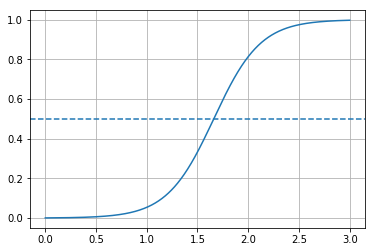

In [35]:
plt.plot(xaxis,yaxis)
plt.axhline(y=0.5,ls='--')
plt.grid()

In [36]:
# x-coordinate where curve exceeds 0.5

In [37]:
x1 = xaxis[yaxis >= 0.5]

In [38]:
x1[:5]

array([1.66066066, 1.66366366, 1.66666667, 1.66966967, 1.67267267])

In [39]:
boundary = x1[0]
boundary

1.6606606606606606

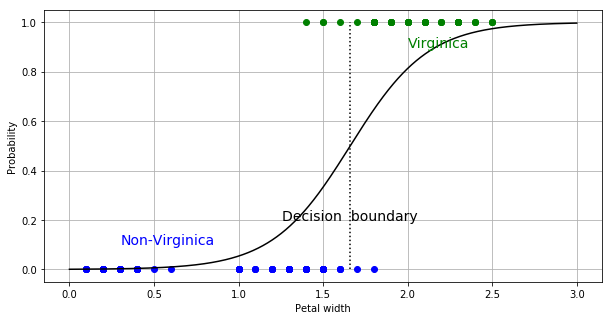

In [40]:
plt.figure(figsize=(10, 5))

# plot blue dots
plt.plot(X[y==0], y[y==0], "bo")

# plot green dots
plt.plot(X[y==1], y[y==1], "go")

# plot fitted curve
plt.plot(xaxis,yaxis,'k')

# plot boundary
plt.plot([boundary, boundary], [0,1], "k:")

plt.text(2.00, 0.9,'Virginica', fontsize=14, color="g")
plt.text(0.30, 0.1,'Non-Virginica', fontsize=14, color="b")
plt.text(boundary, 0.2, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.grid()

In [41]:
# Boundary predicts species of flowers with petal width smaller than 1.66 cm as non-virginica

## ROC curve

In [ ]:
# import roc_curve, roc_auc_score, accuracy_score

In [43]:
from sklearn import metrics

In [44]:
ypred = log_reg.predict(X)

In [45]:
metrics.accuracy_score(y,ypred)

0.96

In [60]:
yproba = log_reg.predict_proba(X)
yproba.shape

(150, 2)

In [61]:
yproba[:5]

array([[0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226]])

In [62]:
y_proba = yproba[::,1]
y_proba.shape

(150,)

In [63]:
y_proba[:5]

array([0.00178226, 0.00178226, 0.00178226, 0.00178226, 0.00178226])

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y,y_proba)

In [83]:
df1 = pd.DataFrame()

In [84]:
df1['fpr'] = fpr

In [85]:
df1['tpr'] = tpr

In [86]:
df1['threshold'] = thresholds

In [88]:
df1[:19]

,fpr,tpr,threshold
0,0.00,0.00,1.974369
1,0.00,0.06,0.974369
2,0.00,0.12,0.961011
3,0.00,0.28,0.941110
4,0.00,0.34,0.911982
5,0.00,0.58,0.813279
6,0.00,0.68,0.738493
7,0.01,0.90,0.646764
8,0.02,0.92,0.542779
9,0.05,0.94,0.434928


In [71]:
auc = metrics.roc_auc_score(y,y_proba)

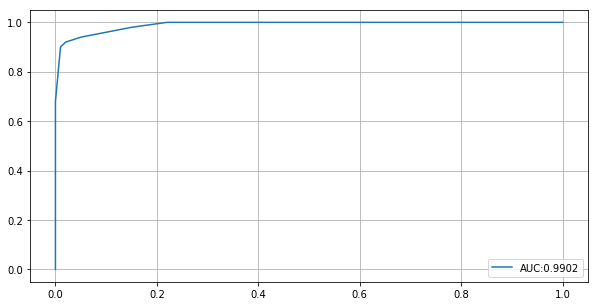

In [73]:
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label='AUC:'+str(auc))
plt.legend(loc=4)
plt.grid()

## two features: petal length, petal width

In [64]:
X = iris["data"][:, (2, 3)]

In [65]:
X[:3]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2]])

In [68]:
log_reg = LogisticRegression(solver="lbfgs",C=10, random_state=42)

In [69]:
log_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
log_reg.intercept_

array([-31.06624834])

In [71]:
log_reg.intercept_[0]

-31.066248342933537

In [72]:
log_reg.coef_

array([[4.42142146, 5.74004612]])

In [73]:
log_reg.coef_[0][0]

4.421421464675028

In [74]:
# set boundary x-coordinates (2,7)

In [75]:
xvalues = np.array([2,7])

In [76]:
# boundary y-coordinates

In [77]:
b0 = log_reg.intercept_[0]

In [78]:
b1 = log_reg.coef_[0][0]

In [79]:
b2 = log_reg.coef_[0][1]

In [80]:
boundary = -(b0 + b1* xvalues) / b2

In [81]:
boundary

array([3.87164231, 0.02026083])

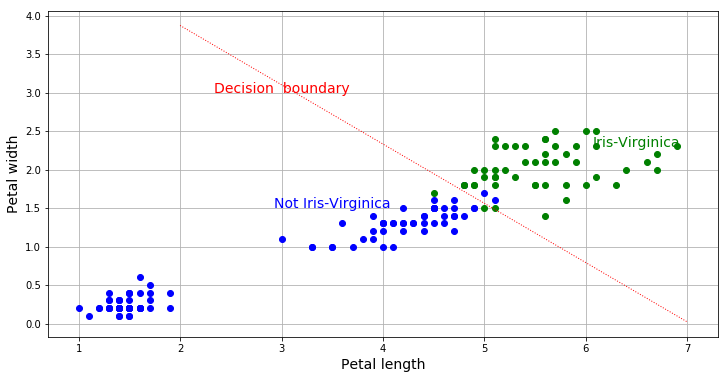

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bo")
plt.plot(X[y==1, 0], X[y==1, 1], "go")

plt.plot(xvalues, boundary, "r:", linewidth=1)
plt.text(3,3, "Decision  boundary", fontsize=14, color="r", ha="center")

plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.grid()

## response with 3 categories

In [ ]:
X = iris["data"][:, (2, 3)]

In [88]:
# petal length and width coordinates -for the coming plot

In [89]:
X1 = iris["data"][:,2]

In [90]:
X2 = iris["data"][:,3]

In [91]:
y = iris["target"]

In [93]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10,
                           random_state=42)

In [94]:
model.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 5).reshape(-1, 1),
        np.linspace(0, 3.5, 4).reshape(-1, 1),)

In [133]:
# x0 splits (0,8) into 5 equally spaced numbers, then repeat the sequence 4 times

In [134]:
x0

array([[0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.]])

In [135]:
# x1 splits (0,3.5) into 4 equally spaced numbers, then repeat the sequence 5 times

In [136]:
x1

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.16666667, 1.16666667, 1.16666667, 1.16666667, 1.16666667],
       [2.33333333, 2.33333333, 2.33333333, 2.33333333, 2.33333333],
       [3.5       , 3.5       , 3.5       , 3.5       , 3.5       ]])

In [97]:
# .ravel() converts x0, x1, into vectors

In [98]:
x0.ravel()

array([0., 2., 4., 6., 8., 0., 2., 4., 6., 8., 0., 2., 4., 6., 8., 0., 2.,
       4., 6., 8.])

In [99]:
x1.ravel()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.16666667, 1.16666667, 1.16666667, 1.16666667, 1.16666667,
       2.33333333, 2.33333333, 2.33333333, 2.33333333, 2.33333333,
       3.5       , 3.5       , 3.5       , 3.5       , 3.5       ])

In [100]:
# create 2-column array with x0.ravel, x1.ravel()

In [102]:
grid = np.concatenate([[x0.ravel(), x1.ravel()]]).T

In [103]:
grid

array([[0.        , 0.        ],
       [2.        , 0.        ],
       [4.        , 0.        ],
       [6.        , 0.        ],
       [8.        , 0.        ],
       [0.        , 1.16666667],
       [2.        , 1.16666667],
       [4.        , 1.16666667],
       [6.        , 1.16666667],
       [8.        , 1.16666667],
       [0.        , 2.33333333],
       [2.        , 2.33333333],
       [4.        , 2.33333333],
       [6.        , 2.33333333],
       [8.        , 2.33333333],
       [0.        , 3.5       ],
       [2.        , 3.5       ],
       [4.        , 3.5       ],
       [6.        , 3.5       ],
       [8.        , 3.5       ]])

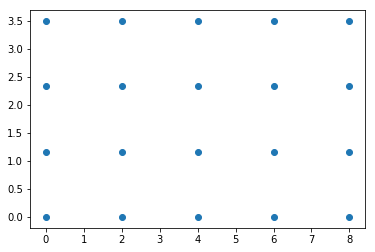

In [104]:
plt.scatter(x0.ravel(),x1.ravel());

In [ ]:
# 20 dots in the grid

In [ ]:
# increase number of dots

In [105]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),)

In [106]:
grid = np.concatenate([[x0.ravel(), x1.ravel()]]).T

In [107]:
grid.shape

(100000, 2)

In [108]:
# predict probabilites

In [109]:
y_proba = model.predict_proba(grid)
y_proba[:5]

array([[9.99996239e-01, 3.76140758e-06, 6.80030712e-20],
       [9.99995941e-01, 4.05882856e-06, 7.85729317e-20],
       [9.99995620e-01, 4.37976703e-06, 9.07856856e-20],
       [9.99995274e-01, 4.72608254e-06, 1.04896691e-19],
       [9.99994900e-01, 5.09978165e-06, 1.21200995e-19]])

In [110]:
# predict response

In [111]:
y_predict = model.predict(grid)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [112]:
y_predict.shape

(100000,)

In [113]:
# need to reshape

In [114]:
m = x0.shape
m

(200, 500)

In [115]:
zpredict = y_predict.reshape(m)
zpredict.shape

(200, 500)

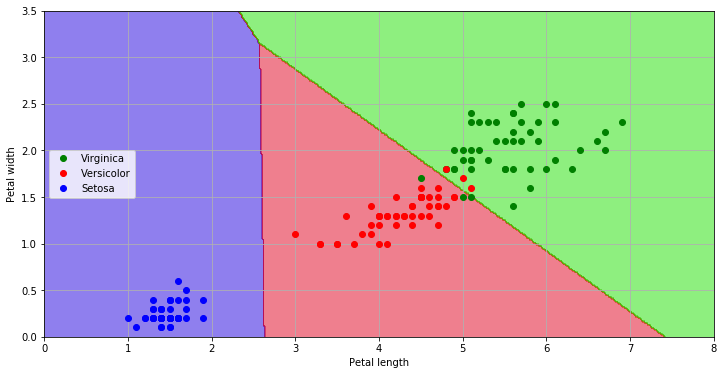

In [134]:
plt.figure(figsize=(12,6))
plt.plot(X1[y==2], X2[y==2], "go", label="Virginica")
plt.plot(X1[y==1], X2[y==1], "ro", label="Versicolor")
plt.plot(X1[y==0], X2[y==0], "bo", label="Setosa")

plt.contourf(x0, x1, zpredict, cmap='brg',alpha=0.5)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.grid()

In [ ]:
# predict iris type (petals 5cm long, 2cm wide)

In [135]:
model.predict([[5, 2]])

array([2])

In [136]:
model.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [137]:
# largest probability is 0.9425, for virginica